In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
inputRDD  = sc.textFile('../data/input.txt')

In [3]:
inputRDD

MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:-2

In [4]:
inputRDD.take(10)

[u'THE HOLY BIBLE',
 u'',
 u'CONTAINING THE OLD AND NEW TESTAMENTS',
 u'',
 u"TRANSLATED OUT OF THE ORIGINAL TONGUES AND WITH THE FORMER TRANSLATIONS DILIGENTLY COMPARED AND REVISED BY HIS MAJESTY'S SPECIAL COMMAND",
 u'',
 u'APPOINTED TO BE READ IN CHURCHES',
 u'',
 u'THE TEXT CONFORMABLE TO THAT OF THE EDITION OF 1611 COMMONLY KNOWN AS THE AUTHORIZED OR KING JAMES VERSION',
 u'']

In [5]:
inputRDD.count()

33979

In [6]:
wordsRDD = inputRDD.flatMap(lambda s: s.split(' '))

In [7]:
wordsRDD.take(10)

[u'THE',
 u'HOLY',
 u'BIBLE',
 u'',
 u'CONTAINING',
 u'THE',
 u'OLD',
 u'AND',
 u'NEW',
 u'TESTAMENTS']

In [8]:
nonEmptyWordsRDD = wordsRDD.filter(lambda w:len(w) > 0)

In [9]:
nonEmptyWordsRDDWithOne = nonEmptyWordsRDD.map(lambda w:(w.lower(),1))

In [10]:
nonEmptyWordsRDDWithCount = nonEmptyWordsRDDWithOne.reduceByKey(lambda a,b: a + b)

In [11]:
nonEmptyWordsRDDWithCount.take(10)

[(u'bedeiah,', 1),
 (u'formed,', 2),
 (u'shouted,', 5),
 (u'jeroboam.', 5),
 (u'yellow', 4),
 (u'four', 297),
 (u'prices', 1),
 (u'gibbar,', 1),
 (u'zohar,', 3),
 (u'slew.', 1)]

In [12]:
countsWithWordsRDD  = nonEmptyWordsRDDWithCount.map(lambda (word,count):(count, word))

In [13]:
countsWithWordsRDD.take(10)

[(1, u'bedeiah,'),
 (2, u'formed,'),
 (5, u'shouted,'),
 (5, u'jeroboam.'),
 (4, u'yellow'),
 (297, u'four'),
 (1, u'prices'),
 (1, u'gibbar,'),
 (3, u'zohar,'),
 (1, u'slew.')]

In [14]:
top10Words = countsWithWordsRDD.sortByKey(False).map(lambda (count,word):(word, count)).take(10)
top10Words

[(u'the', 64602),
 (u'and', 50534),
 (u'of', 34759),
 (u'to', 13754),
 (u'in', 12556),
 (u'that', 12016),
 (u'he', 10179),
 (u'shall', 9411),
 (u'unto', 8968),
 (u'i', 8660)]

([<matplotlib.axis.XTick at 0x105d852d0>,
 <a list of 10 Text xticklabel objects>)

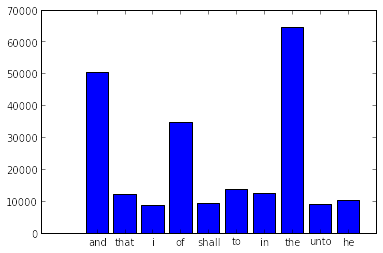

In [15]:
import matplotlib.pyplot as plt

dictionary = plt.figure()

D = dict(top10Words)

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), D.keys())
